<a href="https://colab.research.google.com/github/Geethikkk/Machine-Learning/blob/main/LAB_8_AP23110010262.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Load and extract the dataset
import pandas as pd
import numpy as np
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Extract the zip file
with zipfile.ZipFile('hotel_bookings.csv.zip', 'r') as zip_ref:
    zip_ref.extractall('.')

# Load the dataset
df = pd.read_csv('hotel_bookings.csv')

print("Dataset loaded successfully!")
print(f"Shape: {df.shape}")
print(f"\nFirst few rows:")
df.head()

Dataset loaded successfully!
Shape: (119390, 32)

First few rows:


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
# Identify numerical and categorical columns
print("Dataset Info:")
print(df.info())
print("\n" + "="*80)

# Separate numerical and categorical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print(f"\nNumerical columns ({len(numerical_cols)}): {numerical_cols}")
print(f"\nCategorical columns ({len(categorical_cols)}): {categorical_cols}")

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  me

In [ ]:
# UNIVARIATE ANALYSIS - NUMERICAL COLUMNS
import warnings
warnings.filterwarnings('ignore')

print("="*80)
print("UNIVARIATE ANALYSIS FOR NUMERICAL COLUMNS")
print("="*80)

# Select a few key numerical columns for detailed analysis
key_numerical_cols = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights',
                      'adults', 'adr', 'total_of_special_requests']

for col in key_numerical_cols:
    print(f"\n{'='*80}")
    print(f"Column: {col}")
    print(f"{'='*80}")

    # Calculate statistics
    data = df[col].dropna()

    print(f"Count: {data.count()}")
    print(f"Mean: {data.mean():.4f}")
    print(f"Median: {data.median():.4f}")
    print(f"Mode: {data.mode().values[0] if len(data.mode()) > 0 else 'N/A'}")
    print(f"Standard Deviation: {data.std():.4f}")
    print(f"Min: {data.min():.4f}")
    print(f"Max: {data.max():.4f}")
    print(f"25th Percentile: {data.quantile(0.25):.4f}")
    print(f"50th Percentile (Median): {data.quantile(0.50):.4f}")
    print(f"75th Percentile: {data.quantile(0.75):.4f}")
    print(f"IQR (Q3-Q1): {data.quantile(0.75) - data.quantile(0.25):.4f}")

UNIVARIATE ANALYSIS FOR NUMERICAL COLUMNS

Column: lead_time
Count: 119390
Mean: 104.0114
Median: 69.0000
Mode: 0
Standard Deviation: 106.8631
Min: 0.0000
Max: 737.0000
25th Percentile: 18.0000
50th Percentile (Median): 69.0000
75th Percentile: 160.0000
IQR (Q3-Q1): 142.0000

Column: stays_in_weekend_nights
Count: 119390
Mean: 0.9276
Median: 1.0000
Mode: 0
Standard Deviation: 0.9986
Min: 0.0000
Max: 19.0000
25th Percentile: 0.0000
50th Percentile (Median): 1.0000
75th Percentile: 2.0000
IQR (Q3-Q1): 2.0000

Column: stays_in_week_nights
Count: 119390
Mean: 2.5003
Median: 2.0000
Mode: 2
Standard Deviation: 1.9083
Min: 0.0000
Max: 50.0000
25th Percentile: 1.0000
50th Percentile (Median): 2.0000
75th Percentile: 3.0000
IQR (Q3-Q1): 2.0000

Column: adults
Count: 119390
Mean: 1.8564
Median: 2.0000
Mode: 2
Standard Deviation: 0.5793
Min: 0.0000
Max: 55.0000
25th Percentile: 2.0000
50th Percentile (Median): 2.0000
75th Percentile: 2.0000
IQR (Q3-Q1): 0.0000

Column: adr
Count: 119390
Mean: 101


HISTOGRAMS FOR NUMERICAL COLUMNS


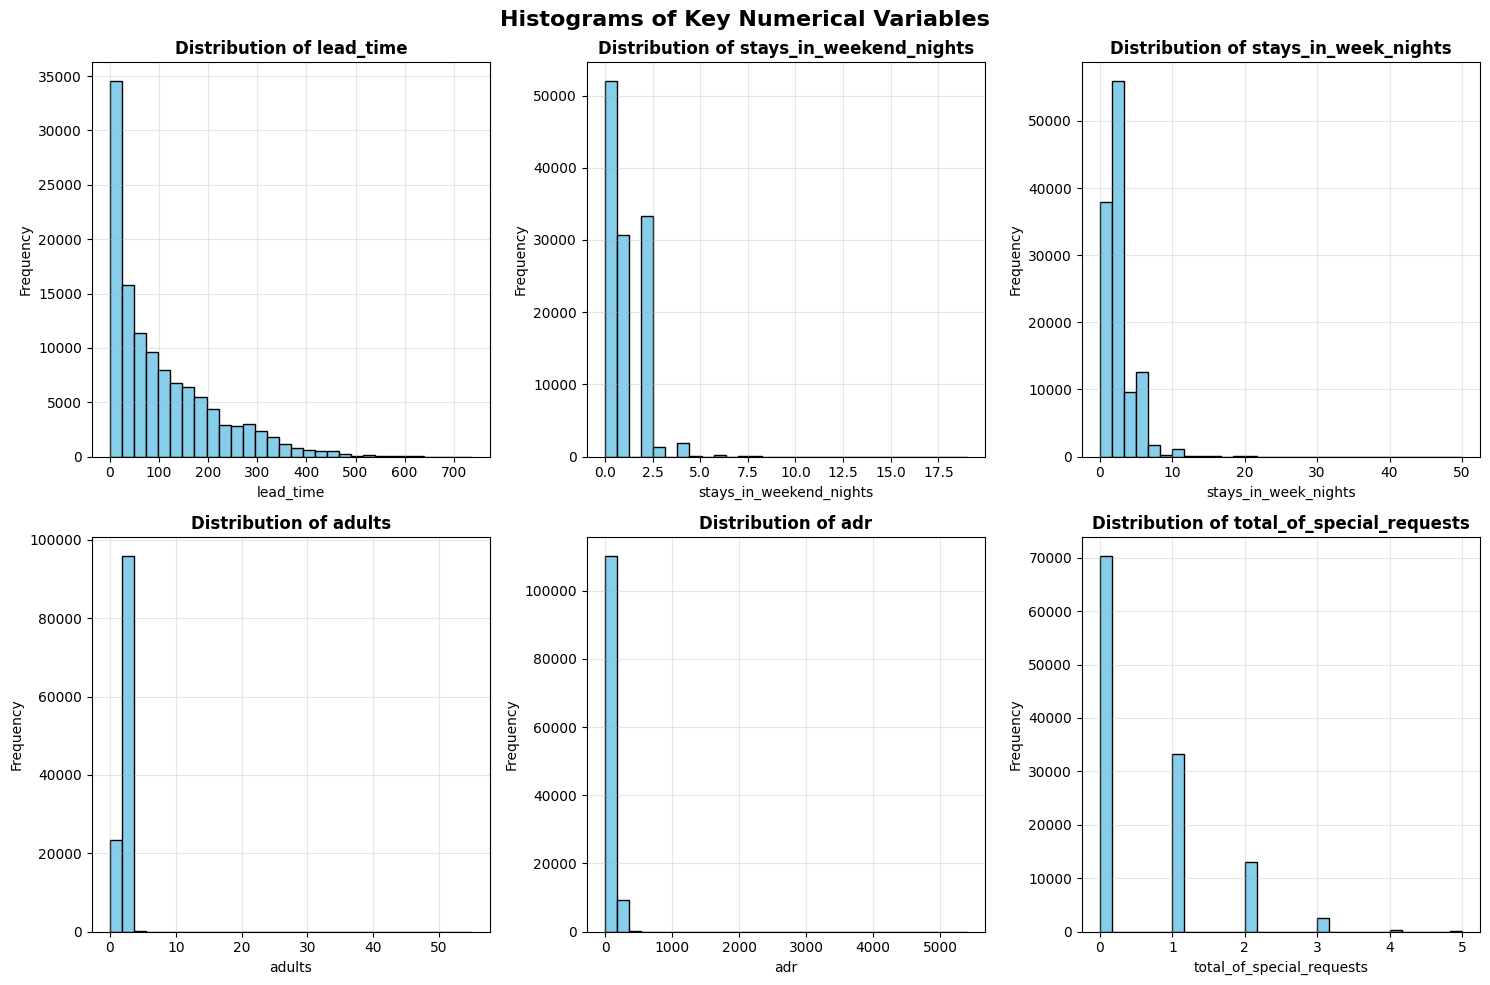

In [ ]:
# Create Histograms for Numerical Columns
print("\n" + "="*80)
print("HISTOGRAMS FOR NUMERICAL COLUMNS")
print("="*80)

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Histograms of Key Numerical Variables', fontsize=16, fontweight='bold')

for idx, col in enumerate(key_numerical_cols):
    row = idx // 3
    col_idx = idx % 3
    ax = axes[row, col_idx]

    df[col].hist(bins=30, ax=ax, edgecolor='black', color='skyblue')
    ax.set_title(f'Distribution of {col}', fontweight='bold')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


BOXPLOTS FOR NUMERICAL COLUMNS


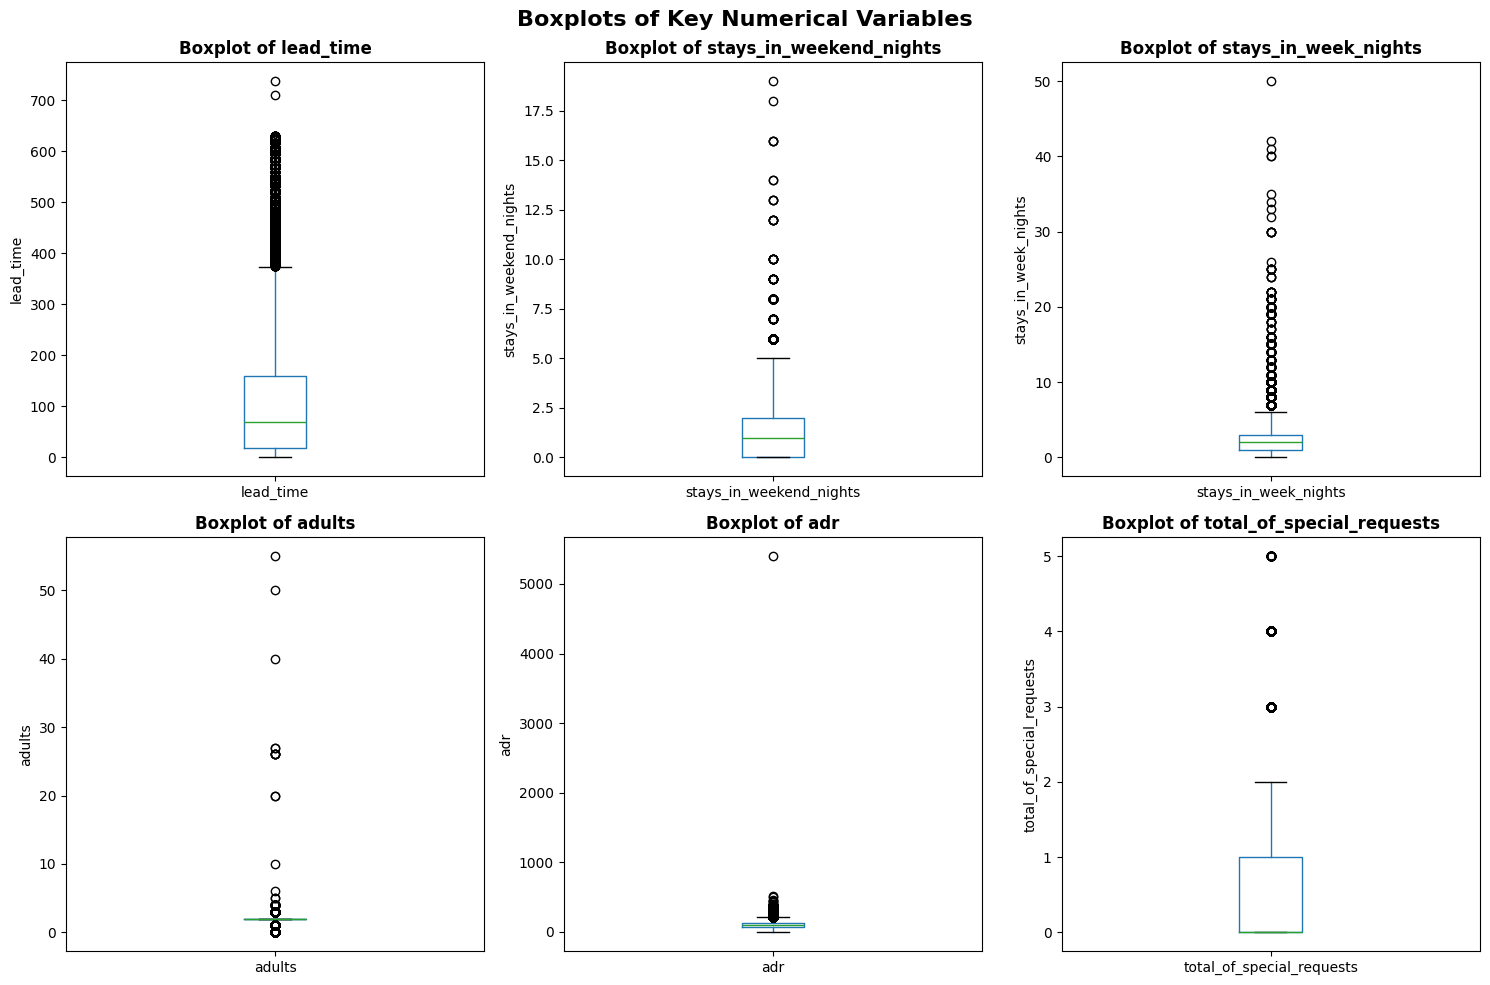

In [ ]:
# Create Boxplots for Numerical Columns
print("\n" + "="*80)
print("BOXPLOTS FOR NUMERICAL COLUMNS")
print("="*80)

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Boxplots of Key Numerical Variables', fontsize=16, fontweight='bold')

for idx, col in enumerate(key_numerical_cols):
    row = idx // 3
    col_idx = idx % 3
    ax = axes[row, col_idx]

    df.boxplot(column=col, ax=ax, grid=False)
    ax.set_title(f'Boxplot of {col}', fontweight='bold')
    ax.set_ylabel(col)

plt.tight_layout()
plt.show()

In [ ]:
# UNIVARIATE ANALYSIS - CATEGORICAL COLUMNS
print("\n" + "="*80)
print("UNIVARIATE ANALYSIS FOR CATEGORICAL COLUMNS")
print("="*80)

# Select key categorical columns for analysis
key_categorical_cols = ['hotel', 'meal', 'market_segment', 'customer_type', 'reservation_status']

for col in key_categorical_cols:
    print(f"\n{'='*80}")
    print(f"Column: {col}")
    print(f"{'='*80}")

    # Calculate statistics
    print(f"Count: {df[col].count()}")
    print(f"Unique Values: {df[col].nunique()}")
    print(f"Mode: {df[col].mode().values[0] if len(df[col].mode()) > 0 else 'N/A'}")
    print(f"\nValue Counts:")
    print(df[col].value_counts())
    print(f"\nValue Distribution (Percentage):")
    print(df[col].value_counts(normalize=True) * 100)


UNIVARIATE ANALYSIS FOR CATEGORICAL COLUMNS

Column: hotel
Count: 119390
Unique Values: 2
Mode: City Hotel

Value Counts:
hotel
City Hotel      79330
Resort Hotel    40060
Name: count, dtype: int64

Value Distribution (Percentage):
hotel
City Hotel      66.446101
Resort Hotel    33.553899
Name: proportion, dtype: float64

Column: meal
Count: 119390
Unique Values: 5
Mode: BB

Value Counts:
meal
BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
Name: count, dtype: int64

Value Distribution (Percentage):
meal
BB           77.318033
HB           12.114080
SC            8.920345
Undefined     0.979144
FB            0.668398
Name: proportion, dtype: float64

Column: market_segment
Count: 119390
Unique Values: 8
Mode: Online TA

Value Counts:
market_segment
Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: cou


BAR PLOTS FOR CATEGORICAL COLUMNS


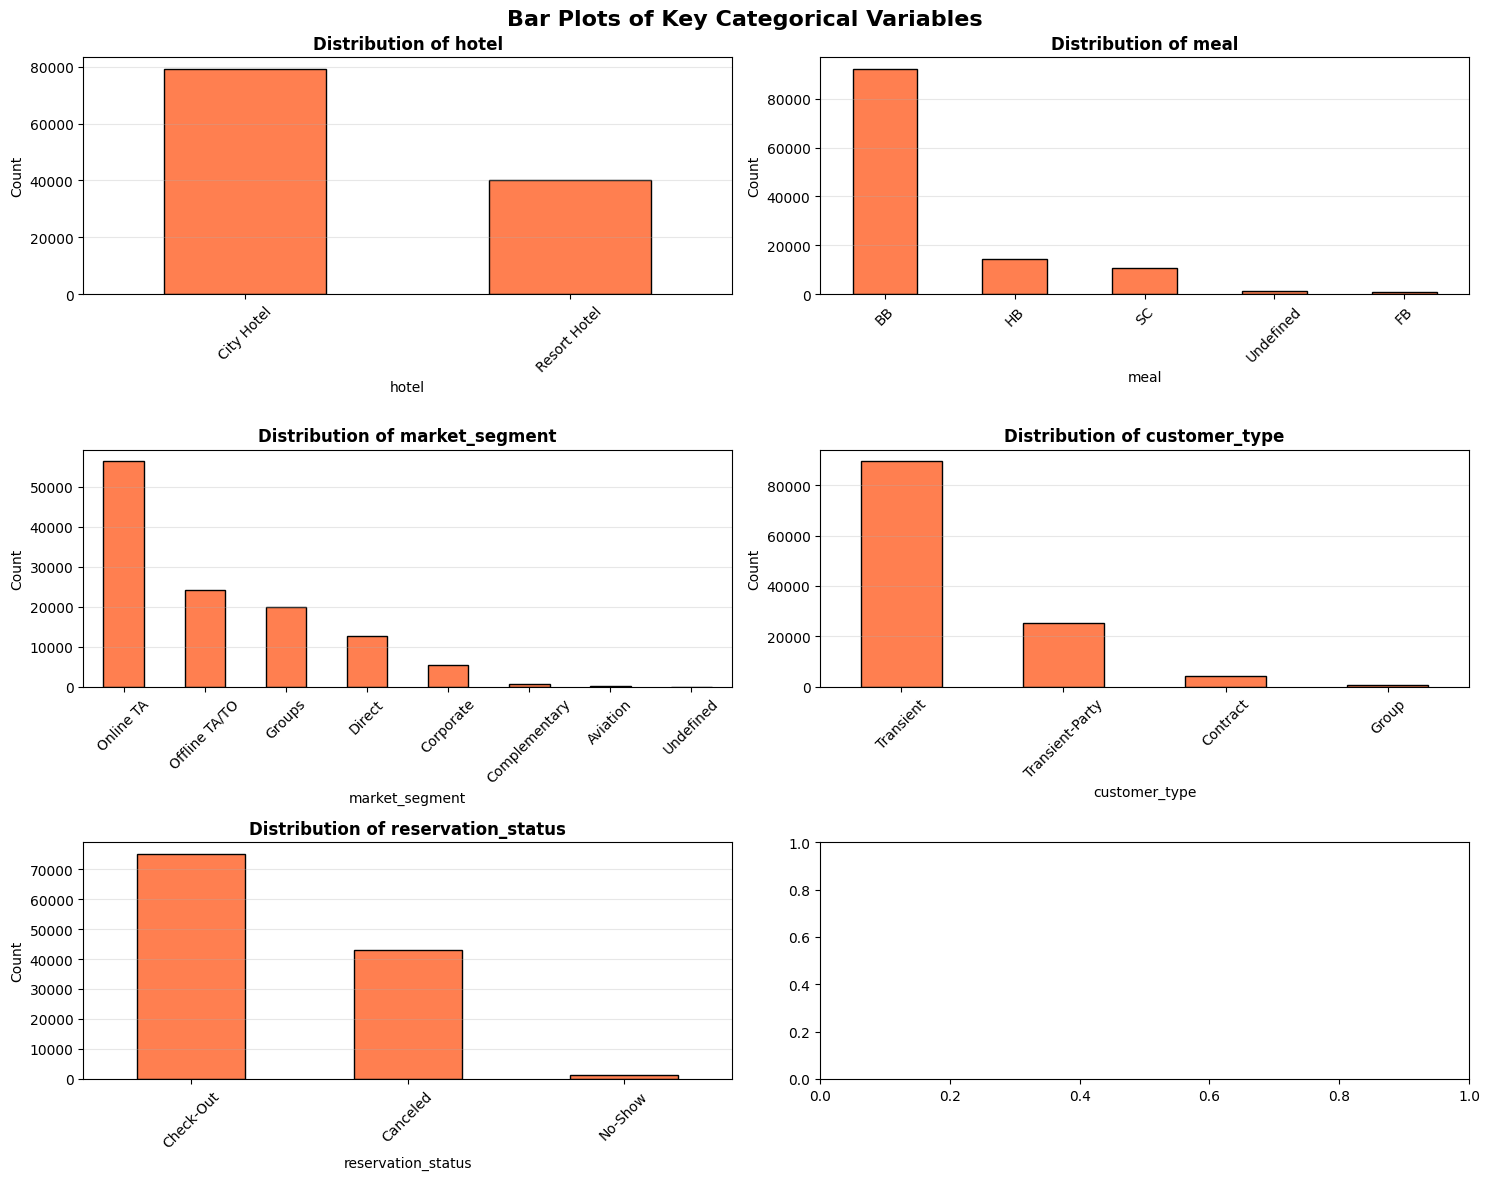

In [ ]:
# Create Bar Plots for Categorical Columns
print("\n" + "="*80)
print("BAR PLOTS FOR CATEGORICAL COLUMNS")
print("="*80)

fig, axes = plt.subplots(3, 2, figsize=(15, 12))
fig.suptitle('Bar Plots of Key Categorical Variables', fontsize=16, fontweight='bold')

for idx, col in enumerate(key_categorical_cols):
    row = idx // 2
    col_idx = idx % 2
    ax = axes[row, col_idx]

    value_counts = df[col].value_counts()
    value_counts.plot(kind='bar', ax=ax, color='coral', edgecolor='black')
    ax.set_title(f'Distribution of {col}', fontweight='bold')
    ax.set_xlabel(col)
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=45)
    ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()


PIE CHARTS FOR CATEGORICAL COLUMNS


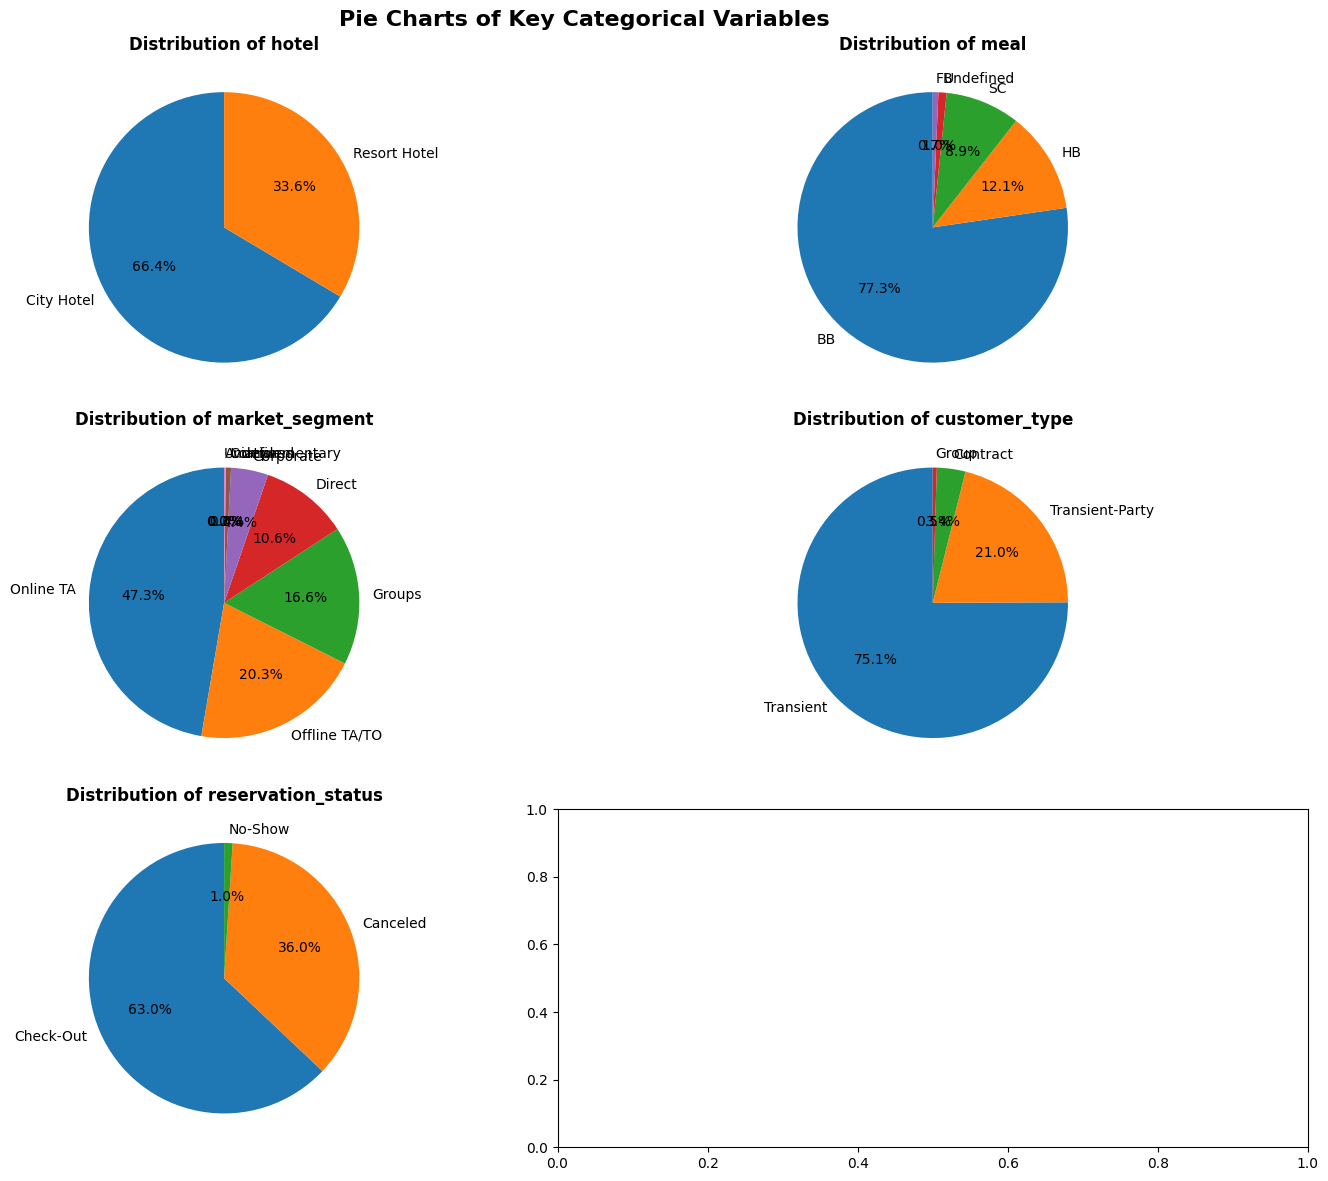

In [ ]:
# Create Pie Charts for Categorical Columns
print("\n" + "="*80)
print("PIE CHARTS FOR CATEGORICAL COLUMNS")
print("="*80)

fig, axes = plt.subplots(3, 2, figsize=(15, 12))
fig.suptitle('Pie Charts of Key Categorical Variables', fontsize=16, fontweight='bold')

for idx, col in enumerate(key_categorical_cols):
    row = idx // 2
    col_idx = idx % 2
    ax = axes[row, col_idx]

    value_counts = df[col].value_counts()
    ax.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90)
    ax.set_title(f'Distribution of {col}', fontweight='bold')

plt.tight_layout()
plt.show()